# 3.4 Guia - Regressão Linear - Redes Neurais

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Base de dados

Metragem = [40,45,50,55,60,65,70,75,80,85,90,95,100,105,110]
Valor    = [200,210,220,230,240,250,280,300,330,360,400,450,550,690,750]

# Organizando em um Dicionario 
Dicionario = {
        'Metragem': Metragem,
        'Valor Imovel': Valor
}

DataFrame = pd.DataFrame(data=Dicionario)
DataFrame.head()

,Metragem,Valor Imovel
0,40,200
1,45,210
2,50,220
3,55,230
4,60,240


In [6]:
# configurar a visualização
#%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#configurando parâmetros das fontes
plt.rcParams['font.family'] = 'sans-serif'

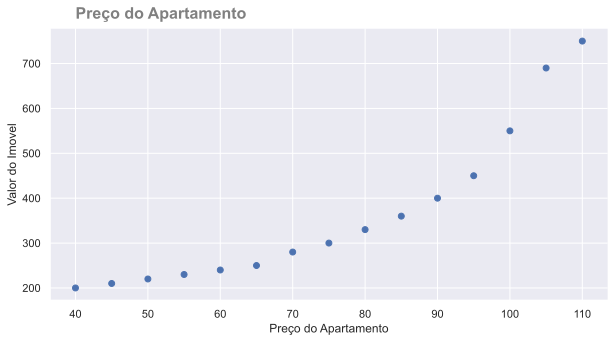

In [13]:
# Plotando os Dados

fig,ax = plt.subplots(figsize=(10,5))

ax.scatter(DataFrame['Metragem'].values,DataFrame['Valor Imovel'].values)
sns.set(style='darkgrid')
plt.xlabel('Preço do Apartamento')
plt.ylabel('Valor do Imovel')

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adicionando um título
plt.text(x=40,
        y=800,
        s='Preço do Apartamento',
        fontsize=16,
        color='grey',
        weight='bold');


In [14]:
# Verificando a Correlação
Eixo_x = DataFrame.iloc[:,0].values
Eixo_y = DataFrame.iloc[:,1].values

Correlação = np.corrcoef(Eixo_x,Eixo_y)
Correlação

array([[1.        , 0.91379598],
       [0.91379598, 1.        ]])

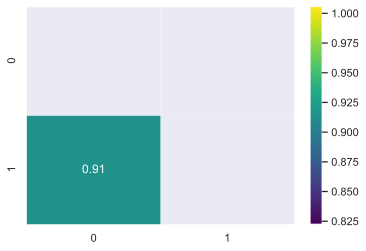

In [19]:
# Plotagem da Correlação
mask = np.triu(np.ones_like(DataFrame.corr(), dtype=np.bool))
sns.heatmap(Correlação, linewidths=.1,cmap='viridis',annot=True,mask=mask);

In [20]:
# Converter o Eixo X para o formato de Matriz
Eixo_x = Eixo_x.reshape(-1,1)
Eixo_y = Eixo_y.reshape(-1,1)

In [21]:
# Transformando os dados em Escalas Proximas

from sklearn.preprocessing import StandardScaler

# Definindo a função para cada eixo
Escala_x = StandardScaler()
Escala_y = StandardScaler()

# Fazendo o escalonamento
x = Escala_x.fit_transform(Eixo_x)
y = Escala_y.fit_transform(Eixo_y)

In [23]:
# Treinar Modelo
from sklearn.neural_network import MLPRegressor

# Definindo os neuronios da Rede
Regressao_Neural = MLPRegressor(hidden_layer_sizes=(4,4),
                               activation='relu',
                               solver='adam',
                               alpha=0.0001,
                               tol=0.0001,
                               max_iter=1000,
                               verbose=False)

# Treinando o modelo
print( Regressao_Neural.fit(x,y))

# Calculando o Score da Regressão
print( '\n', Regressao_Neural.score(x,y))

C:\Users\Vithep\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(hidden_layer_sizes=(4, 4), max_iter=1000)

 0.920368208821514


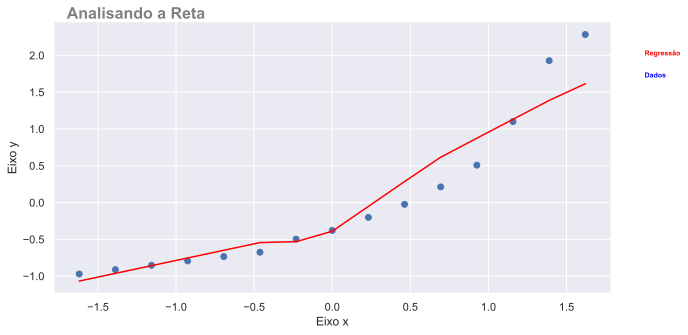

In [29]:
# Plotando os Dados

fig,ax = plt.subplots(figsize=(10,5))

ax.scatter(x,y)
ax.plot(x,Regressao_Neural.predict(x),color='red')
sns.set(style='darkgrid')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adicionando um título
plt.text(x=-1.7,
        y=2.5,
        s='Analisando a Reta',
        fontsize=16,
        color='grey',
        weight='bold');

# Adicionando Legenda
plt.text(x=2,
        y=2,
        s='Regressão',
        fontsize=7,
        color='red',
        weight='bold');

plt.text(x=2,
        y=1.7,
        s='Dados',
        fontsize=7,
        color='blue',
        weight='bold');

In [32]:
# Fazendo uma Previsão

# Qual o tamanho do Apartamento?
Qual_tamanho_apartamento = [[50]]

Escalando_Previsao = Escala_y.transform(Qual_tamanho_apartamento)
Previsao = Regressao_Neural.predict(Escalando_Previsao)
Transformando_Previsao = Escala_y.inverse_transform(Previsao)

print('Um apartamento de: ',
     Qual_tamanho_apartamento[0][0], 'metros')
print('Usando o modelo, custaria: R$', Transformando_Previsao[0])

Um apartamento de:  50 metros
Usando o modelo, custaria: R$ 165.68390052591351
